[합성곱 신경망]

 - 합성곱 신경망은 이미지나 영상을 처리하는 데 유용하다.

[구조]
 - 합성곱 신경망은 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망이다.
 - 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있으며 다음과 같은 계층으로 구성
 1. 입력층
 2. 합성곱층
 3. 풀링층
 4. 완전연경층
 5. 출력층

[입력층]
 - 입력 이미지 데이터가 최초로 거치게 되는 계층
 - 이미지는 단순 1차원 데이터가 아닌 (높이, 너비, 채널)의 값을 갖는 3차원 데이터
 - 이때 채널은 이미지가 그레이스케일이면 1, 컬러면 3 값을 가진다.

[합성곱층]
 - 입력 데이터에서 특성을 추출하는 역할
 - 입력 이미지가 들어왔을 때 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용
 - 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 이렇게 추출한 결과물이 특성 맵
 스트라이드는 지정된 간격에 따라 순차적으로 이동

 - 입력 데이터: W1 X H1 X D1 (W1:가로, H1:세로, D1:채널)
 - 하이퍼파라미터
   * 필터 개수: K
   * 필터 크기: F
   * 스트라이드: S
   * 패딩: P
 - 출력 데이터
   * W2 = (W1-F+2P)/S+1
   * H2 = (H1=F+2P)/S+1
   * D2 = K

[폴링층]
 - 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링 하여 연산량을 감소시키고 주요한 특성 벡터를 추출하여 학습을 효과적으로 가능
 - 다운 샘플링은 이미지를 축소
 

 - [폴링 연산]
 1. 최대 폴링: 대상 영역에서 최댓값을 추출
 2. 평균 풀링: 대상 영역에서 평균을 반환 

1D, 2D, 3D 합성곱
합성곱은 이동하는 방향의 수와 출력 형태에 따라 1D, 2D, 3D로 분류할 수 이다.

 - 1D 합성곱
    - 1D 합성곱은 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱이다.
    - 입력: W너비 (width)
    - 필터: kXk (높이X너비)
    - 출력: W너비(Width)

 - 2D 합성곱
    - 2D 합성곱은 필터가 다음 그림과 같이 방향 두 개로 움직이는 형태입니다.
    - 즉, 입력(W,H)과 필터 (k,k)에 대한 출력은 (W,H)가 되며, 출력 형태는 2D 형렬이 된다.

 - 3D 합성곱
    - 입력(W,H,L)에 대해 필터 (k,k,d)를 적용하면 출력으로 (W,H,L)을 갖는 형태가 3D 합성곱입니다.

3D 입력을 갖는 2D 합성곱
 - 

입력이 3D형태임에도 출력 형태가 3D가 아닌 2D행렬을 취하는 것이 '3D 입력을 갖는 2D 합성곱이다. 

[합성곱 신경망 맛보기]
fashion_mnist 데이터셋을 사용하여 합성곱 신경망을 구현

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
train_dataset  = torchvision.datasets.FashionMNIST("FashionMNIST/", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_dataset  = torchvision.datasets.FashionMNIST("FashionMNIST/", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()])) 

In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

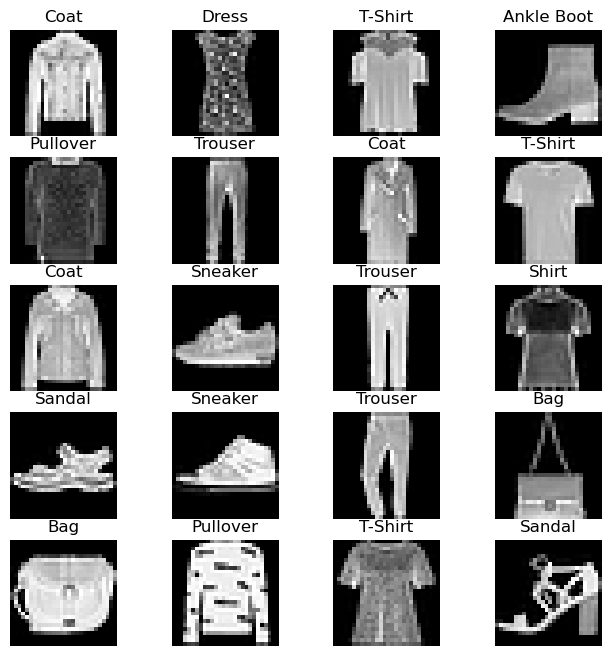

In [ ]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [8]:
# 심층신경망 모델 생성
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN,self).__init__()
        self.fc1 = nn.Linear(in_features=784,out_features=256)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=256,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=10)

    def forward(self,input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

 1. nn.Sequential을 사용하면 __init__()에서 사용할 네트워크 모델들을 정의해 줄 뿐만 아니라, forward() 함수에서 구현될 순전파를 계층형태로 좀 더 가독성이 뛰어난 코드로 작성할 수 있다.
 2. 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출한다. 합성곱이란 커널이라는 nxm 크기의 행렬이 높이(h)X너비(w)크기의 이미지를 처음부터 끝까지 흝으면서 각 원소 값끼리 곱한 후 모두 더한 값을 출력한다.
    - in_channels: 입력 채널의 수를 의미한다. 흑백 이미지는 1, RGB 값을 가진 이미지는 3을 가진 경우가 많다.
    - out_channels: 출력 채널의 수를 의미한다
    - kernel_size: 커널 크기를 의미하며 논문에 따라 필터라고도 한다. 커널은 이미지 특징을 찾아내기 위한 공용 파라미터이며, CNN에서 학습 대상은 필터 파라미터가 된다.
    - padding: 패딩 크기를 의미하는 것으로 출력 크기를 조정하기 위해 입력 데이터 주위에 0을 채운다. 패딩 값이 클수록 출력 크기도 커진다.
 3. BatchNorm2d는 학습 과정에서 각 배치 단위별로 데이터가 다양한 분포를 가지더라도 평균과 분산을 이용하여 정규화하는 것을 의미한다. 평균은 0, 표준편차는 1로 데이터의 분포가 조정된다.
 4. MaxPool2d는 이미지 크기를 축소시키는 용도로 사용한다. 폴링 계층은 합성곱층의 출력 데이터를 입력으로 받아서 출력 데이터의 크기를 줄이거나 특정 데이터를 강조하는 용도로 사용된다.
   - kernel_size: mxn 행렬로 구성된 가중치
   - stride: 입력 데이터에 커널을 적용할 때 이동할 간격을 의미하는데, 스트라이드 값이 커지면 출력 크기는 작아진다.
 5. 클래스를 분류하기 위해서는 이미지 형태의 데이터를 배열 형태로 변환하여 작업해야한다, 패딩과 스트라이드의 값에 따라 출력 크기가 달라진다. 이렇게 줄어든 출력 크기는 최종적으로 분류를 담당하는 완전연결층으로 전달된다.
   - in_features: 입력 데이터의 크기를 의미한다. 중요한 것은 이전까지 수행했던 MaxPool2d는 이미지 데이터를 입력으로 받아 처리했다.
 - Conv2d 계층에서의 출력 크기 구하는 공식
   - 출력크기= (W-F+2P)/S+1
      * W: 입력 데이터의 크기(input_volume_size)
      * F: 커널크기
      * P: 패딩크기
      * S: 스트라이드

In [9]:
# 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
# 모델 학습 및 성능 평가
num_epochs = 10
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(images.size(0), 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

c:\Users\kdp\anaconda3\envs\DL_TORCH\lib\site-packages\torch\nn\functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.597097635269165, Accuracy: 83.5999984741211%
Iteration: 1000, Loss: 0.46306365728378296, Accuracy: 84.30999755859375%
Iteration: 1500, Loss: 0.3768545985221863, Accuracy: 84.05000305175781%
Iteration: 2000, Loss: 0.406042218208313, Accuracy: 85.63999938964844%
Iteration: 2500, Loss: 0.2311224341392517, Accuracy: 86.06999969482422%
Iteration: 3000, Loss: 0.28098025918006897, Accuracy: 86.94000244140625%
Iteration: 3500, Loss: 0.4120790362358093, Accuracy: 86.97000122070312%
Iteration: 4000, Loss: 0.35615211725234985, Accuracy: 86.38999938964844%
Iteration: 4500, Loss: 0.27810317277908325, Accuracy: 87.18000030517578%
Iteration: 5000, Loss: 0.2843819558620453, Accuracy: 87.12999725341797%
Iteration: 5500, Loss: 0.17178910970687866, Accuracy: 87.04000091552734%
Iteration: 6000, Loss: 0.2479413002729416, Accuracy: 87.4800033569336%


Max Accuracy = 88.4

[Fashion CNN]

In [11]:
class FashionCNN(nn.Module):    
    def __init__(self):
        super(FashionCNN, self).__init__()        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )       
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)       
        return out

In [12]:
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [13]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.4518815875053406, Accuracy: 87.36000061035156%
Iteration: 1000, Loss: 0.3088279664516449, Accuracy: 86.81999969482422%
Iteration: 1500, Loss: 0.2715870141983032, Accuracy: 88.08999633789062%
Iteration: 2000, Loss: 0.1624222993850708, Accuracy: 89.0%
Iteration: 2500, Loss: 0.10291896760463715, Accuracy: 89.91000366210938%
Iteration: 3000, Loss: 0.22659695148468018, Accuracy: 89.4800033569336%


[전이 학습]

전이학습이란, 이미지넷처럼 아주 큰 데이터셋을 써서 훈련된 모델의 가중치를 가져와 우리가 해결하려는 과제에 맞게 보정해서 사용하는 것을 의미한다. 

#5.3.1 특성 추출 기법

특성추출은 ImageNet 데이터셋으로 사전 훈련된 모델을 가져온 후 마지막에 완전연결층 부분만 새로 만든다. 즉, 학습할 때는 마지막 완전연결층만 학습하고 나머지 계층들은 학습되지 않도록 한다.

 - 합성곱층: 합성곱층과 풀링층으로 구성
 - 데이터 분류기(완전연결층): 추출된 특성을 입력받아 최종적으로 이미지에 대한 클래스를 분류하는 부분
 

In [14]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [ ]:
# 이미지 데이터 전처리 방법 정의
data_path = '../ch5/data/catanddog/train'
    
transform = transforms.Compose(
                [
                    transforms.Resize([256, 256]),
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                ])
train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

print(len(train_dataset))

385


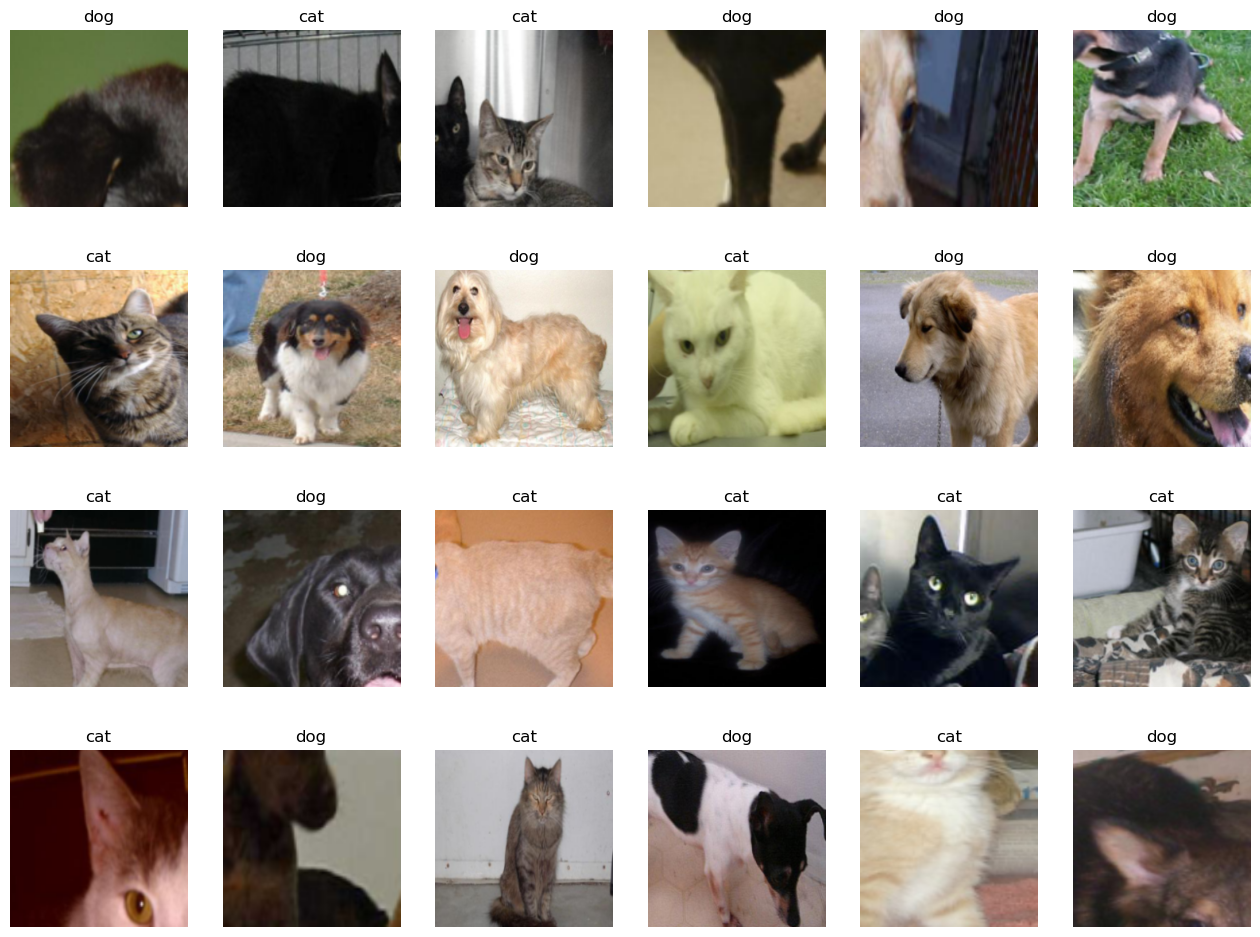

In [ ]:
# 학습에 사용될 이미지 출력
samples, labels = next(iter(train_loader))
classes = {0:'cat', 1:'dog'}
fig = plt.figure(figsize=(16,24))
for i in range(24):
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [20]:
# 사전 훈련된 모델 내려받기
resnet18 = models.resnet18(pretrained=True)

c:\Users\kdp\anaconda3\envs\DL_TORCH\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kdp\anaconda3\envs\DL_TORCH\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\kdp/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [21]:
# 사전 훈련된 모델의 파라미터 학습 유무 지정
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
set_parameter_requires_grad(resnet18)

In [22]:
# ResNet18에 완전연결층 추가
resnet18.fc = nn.Linear(512, 2)  # 2는 클래스가 2개라는 의미

In [23]:
# 모델의 파라미터 값 확인
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc.weight tensor([[-0.0218, -0.0409, -0.0004,  ...,  0.0352, -0.0157, -0.0211],
        [ 0.0148,  0.0218,  0.0432,  ...,  0.0221,  0.0152,  0.0177]])
fc.bias tensor([-0.0192, -0.0440])


In [ ]:
# 모델 객체 생성 및 손실 함수 정의
model = models.resnet18(pretrained = True) # 모델의 객체 생성

for param in model.parameters():  # 모델의 합성곱층 가중치 고정
    param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():  # 완전연결층은 학습
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()  # 손실 함수 정의의
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
# 모델 학습을 위한 함수 생성
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()    
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)        
        torch.save(model.state_dict(), os.path.join('../ch5/data/catanddog', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    return acc_history, loss_history

In [30]:
# 파라미터 학습 결과를 옵티마이저에 전달
params_to_update = []
for name,param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [31]:
# 모델 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.3654 Acc: 0.8597

Epoch 1/12
----------
Loss: 0.3137 Acc: 0.8701

Epoch 2/12
----------
Loss: 0.2475 Acc: 0.9299

Epoch 3/12
----------
Loss: 0.2955 Acc: 0.8649

Epoch 4/12
----------
Loss: 0.3028 Acc: 0.8494

Epoch 5/12
----------
Loss: 0.3265 Acc: 0.8286

Epoch 6/12
----------
Loss: 0.3292 Acc: 0.8649

Epoch 7/12
----------
Loss: 0.2085 Acc: 0.9143

Epoch 8/12
----------
Loss: 0.2070 Acc: 0.9299

Epoch 9/12
----------
Loss: 0.1849 Acc: 0.9299

Epoch 10/12
----------
Loss: 0.2014 Acc: 0.9221

Epoch 11/12
----------
Loss: 0.1769 Acc: 0.9273

Epoch 12/12
----------
Loss: 0.1603 Acc: 0.9506

Training complete in 6m 58s
Best Acc: 0.950649


In [38]:
# 테스트 데이터 호출 및 전처리
test_path = '../ch5/data/catanddog/test'

transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

98


In [37]:
# 테스트 데이터 평가 함수 생성
def eval_model(model, dataloaders, device):
    since = time.time()    
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('../ch5/data/catanddog/' + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)

            _, preds = torch.max(outputs.data, 1)           
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.eq(labels.cpu()).int().sum()
            
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

In [39]:
# 테스트 데이터를 평가 함수에 적용
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['../ch5/data/catanddog\\00.pth', '../ch5/data/catanddog\\01.pth', '../ch5/data/catanddog\\02.pth', '../ch5/data/catanddog\\03.pth', '../ch5/data/catanddog\\04.pth', '../ch5/data/catanddog\\05.pth', '../ch5/data/catanddog\\06.pth', '../ch5/data/catanddog\\07.pth', '../ch5/data/catanddog\\08.pth', '../ch5/data/catanddog\\09.pth', '../ch5/data/catanddog\\10.pth', '../ch5/data/catanddog\\11.pth', '../ch5/data/catanddog\\12.pth']
Loading model ../ch5/data/catanddog\00.pth


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14632\3899934345.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Acc: 0.9286

Loading model ../ch5/data/catanddog\01.pth
Acc: 0.9490

Loading model ../ch5/data/catanddog\02.pth
Acc: 0.9592

Loading model ../ch5/data/catanddog\03.pth
Acc: 0.9694

Loading model ../ch5/data/catanddog\04.pth
Acc: 0.9388

Loading model ../ch5/data/catanddog\05.pth
Acc: 0.9592

Loading model ../ch5/data/catanddog\06.pth
Acc: 0.9694

Loading model ../ch5/data/catanddog\07.pth
Acc: 0.9388

Loading model ../ch5/data/catanddog\08.pth
Acc: 0.9796

Loading model ../ch5/data/catanddog\09.pth
Acc: 0.9184

Loading model ../ch5/data/catanddog\10.pth
Acc: 0.9490

Loading model ../ch5/data/catanddog\11.pth
Acc: 0.9388

Loading model ../ch5/data/catanddog\12.pth
Acc: 0.9796

Validation complete in 1m 16s
Best Acc: 0.979592


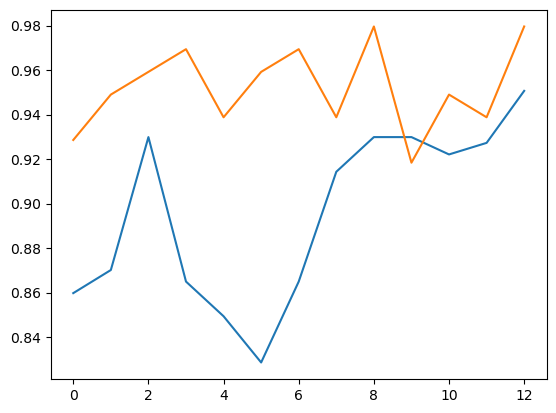

In [40]:
# 훈련과 테스트 데이터의 정확도를 그래프로 확인
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

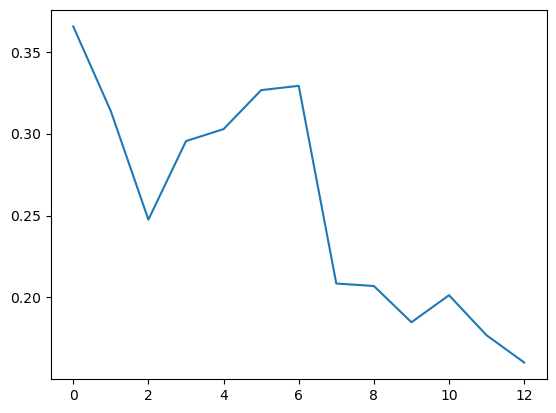

In [41]:
# 훈련 데이터의 오차에 대한 그래프 확인
plt.plot(train_loss_hist)
plt.show()

In [42]:
# 예측 이미지 출력을 위한 전처리 함수
def im_convert(tensor):  
    image=tensor.clone().detach().numpy()  
    image=image.transpose(1,2,0)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  
    return image  

tensor.clone() - 메모리 새롭게 할당, 계산 그래프에 계속 상주
tensor.detach() - 메모리 공유해서 사용, 계산 그래프에 상주하지 않음
tensor.clone().detach() - 메모리 새롭게 할당, 계산 그래프에 상주하지 않음

[계산 그래프]
 - 계산그래프란 계산 과정을 그래프로 나타낸 것이다. 그래프는 여러 개의 노드와 그 노드들을 연결하는 선인 에지로 구성된다
    * 사용이유
      - 국소적 계산이 가능하다. 국소적 계산이 가능하는 의미는 Z 값이 변경되었다면 X,Y 계산 결과를 그대로 유지한 채로 바뀐 Z의 연산이 필요한 F=AxZ만 계산하면 된다
      - 역전파를 통한 미분 계산이 편리하다. 연쇄법칙을 이용하여 빠르고 간편하게 미분을 계산할 수 있다.
        * 연쇄법칙: 두 개 이상의 함수가 결합된 함수, 즉 합성 함수의 미분법을 연쇄 법칙 혹은 체인룰이라고 한다.

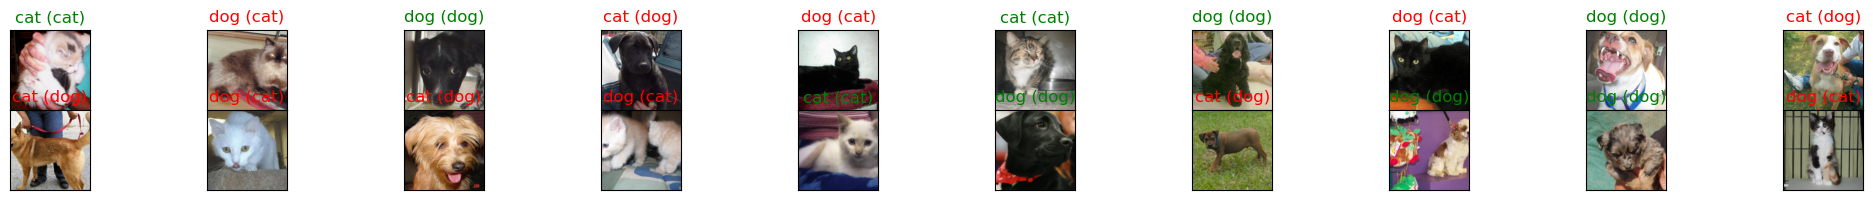

In [45]:
# 강아지 고양이 예측 결과 출력
classes = {0: 'cat', 1: 'dog'}

dataiter = iter(test_loader)
images, labels = next(dataiter)  # 수정: next()로 이미지와 라벨 받아오기

output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    ax.imshow(im_convert(images[idx]))  # 수정: plt가 아닌 ax 사용
    ax.set_title(
        "{} ({})".format(classes[preds[idx].item()], classes[labels[idx].item()]),
        color=("green" if preds[idx] == labels[idx] else "red")
    )

plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
plt.show()


[미세 조정 기법]
 - 미세 조정 기법은 특정 추출 기법에서 더 나아가 사전 훈련된 모델과 합성곱층, 데이터 분류기의 가중치를 업데이트하여 훈련시키는 방식.
    * 데이터셋이 크고 사전 훈련된 모델과 유사성이 작을 경우: 모델 전체를 재학습시킨다. 데이터셋 크기가 크기 때문에 재학습시키는 것이 좋은 전략
    * 데이터셋이 크고 사전 훈련된 모델과 유사성이 클   경우: 합성곱층의 뒷부분과 데이터 분류기를 학습시킨다. 데이터셋이 유사하기 때문에 전체를 학습시키는 것보다는 강한 특징이 나타나는 합성곱층의 뒷부분과 데이터 분류기만 새로 학습하더라도 최적의 성능을 낼 수 있다.
    * 데이터셋이 작고 사전 훈련된 모델과 유사성이 작을 경우: 합성곱층의 일부분과 데이터 분류기를 학습시킨다. 데이터가 적기 때문에 일부 계층에 미세 조정 기법을 적용한다고 해도 효과가 없을 수 있다.
    * 데이터셋이 작고 사전 훈련된 모델과 유사성이 클   경우: 데이터 분류기만 학습시킨다. 데이터가 적기 때문에 많은 계층에 미세 조정 기법을 적용하면 과적합이 발생할 수 있다.

[설명 가능한 CNN]

In [46]:
# 특성 맵 시각화

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
# 설명 가능한 네트워크 생성
class XAI(torch.nn.Module):
    def __init__(self, num_classes=2):
        super(XAI, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 512, bias=False),
            nn.Dropout(0.5),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x)

In [49]:
# 모델 객체화
model=XAI()
model.to(device)
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

In [51]:
# 특성 맵을 확인하기 위한 클래스 정의
class LayerActivations:
    features=[]
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
   
    def hook_fn(self, module, input, output):
        self.features = output.detach().numpy()
 
    def remove(self): 
        self.hook.remove()

torch.Size([1, 3, 100, 100])


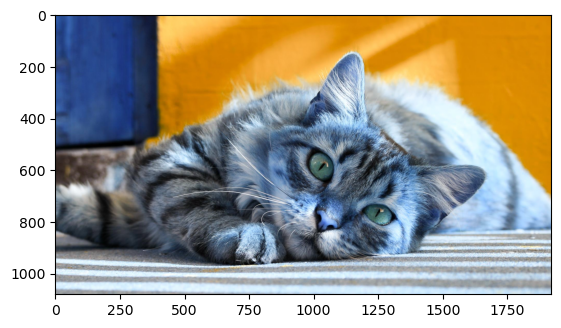

In [52]:
# 이미지 호출
img=cv2.imread("../ch5/data/cat.jpg")   
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)
print(img.shape)

In [53]:
# Conv2d 특성 맵 확인
result = LayerActivations(model.features, 0)

model(img)
activations = result.features

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14632\3953847371.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


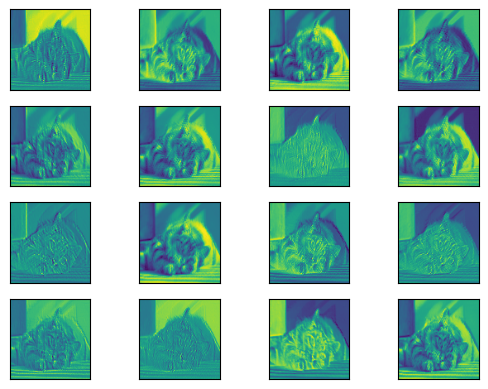

<Figure size 1200x800 with 0 Axes>

In [54]:
# 특성 맵 확인
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14632\3953847371.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


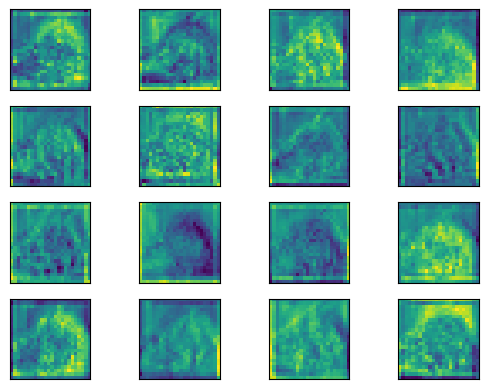

<Figure size 1200x800 with 0 Axes>

In [55]:
# 20번째 계층에 대한 특성 맵
result = LayerActivations(model.features, 20)

model(img)
activations = result.features
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14632\3953847371.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


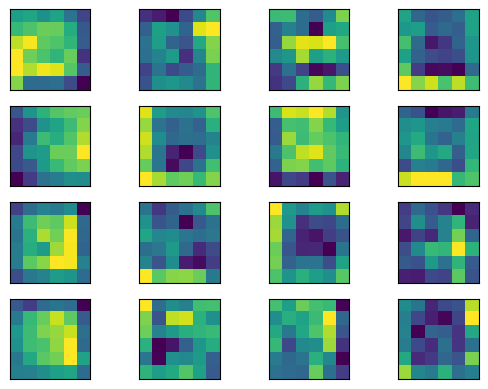

<Figure size 1200x800 with 0 Axes>

In [56]:
# 40번째 계층에 대한 특성 맵
result = LayerActivations(model.features, 40)

model(img)
activations = result.features

fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

[ 그래프 합성곱 네트워크 ]

 - 그래프란
    * 그래프는 방향성이 있거나 없는 에지로 연결된 노드의 집합이다. 여기에서 노드와 에지는 일반적으로 풀고자 하는 문제에 대한 전문가 지식이나 직관 등으로 구성된다
        - 노드: 파란색 원이 노드
        - 에지: 두 노드를 연결한 선을 의미

[ 그래프 신경망 ]

 - 그래프 신경망은 그래프 구조에서 사용하는 신경망을 의미한다.
    1. 인접 행렬
    2. 특성 행렬

    